# Yelp-Business-Review-Analysis
# Natual Language Processing- Sentiment Analysis Project

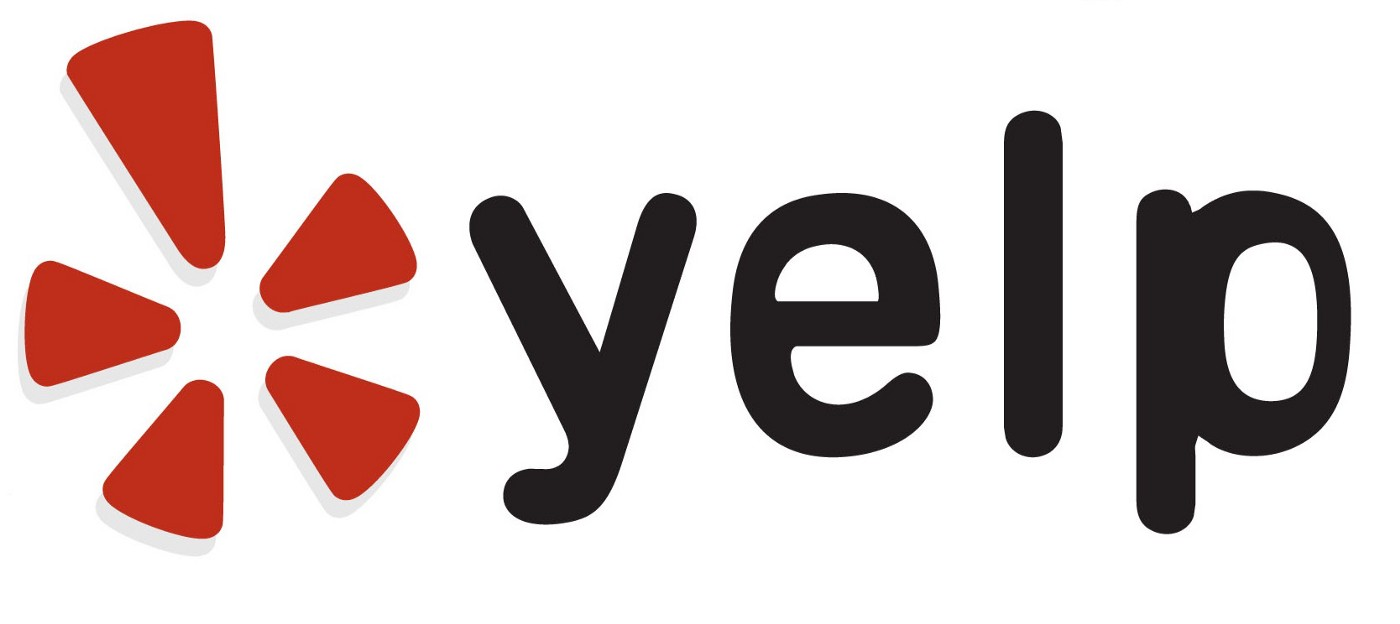

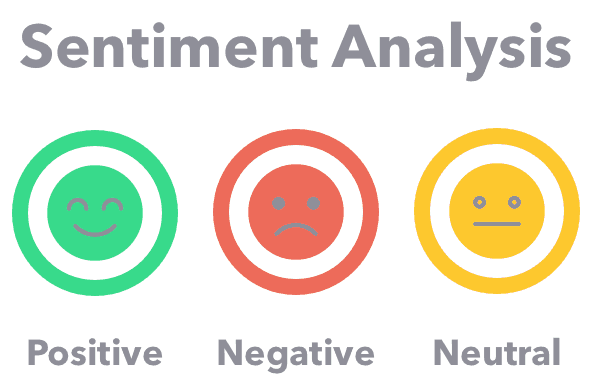

# 1. Overall Project Objectives

Yelp is an application to provide the platform for customers to write reviews and provide a star-rating. A research indicates that a one-star increase led to 59% increase in revenue of independent restaurants. Therefore, we see great potential of Yelp dataset as a valuable insights repository.

The main purpose of our project is to conduct thorough analysis on customers' reviews on different types of cuisines in the United States. By analysing reviews, we can find which words are frequently mentioned in the positive or negative reviews. This can help us to make recommendations of the future improvement and profit growth for these restaurants. Also, based on customers' reviews, we want to utilise machine learning algorithms to predict costumes' attitudes towards this restaurant. We want to classify customers' reviews, and to comprehensively understand customers' needs and expectations of these restaurants. 

# 2. Description of Data


The Yelp dataset is downloaded from Kaggle website. In total, there are 5,200,000 user reviews, information on 174,000 business. we will focus on two tables which are business table and review table.

Dataset Link: https://www.kaggle.com/yelp-dataset/yelp-dataset



A part of code is from https://github.com/zoehuang7/Yelp-Review-Analysis/blob/master/Group%2021%20-%20Yelp%20Reviw%20Analysis.ipynb

## 2.1 Variables of business table are as following:

business_id: ID of the business
    
name: name of the business neighborhood
    
address: address of the business
    
city: city of the business
    
state: state of the business
    
postal_code: postal code of the business
    
latitude: latitude of the business
    
longitude: longitude of the business
    
stars: average rating of the business
    
review_count: number of reviews received
    
is_open: 1 if the business is open, 0 therwise
    
categories: multiple categories of the business


## 2.2 Variables of review table are as following:

review_id: ID of the review
    
user_id: ID of the user
    
business_id: ID of the business
    
stars: ratings of the business
    
date: review date
    
text: review from the user
    
useful: number of users who vote a review as usefull
    
funny: number of users who vote a review as funny
    
cool: number of users who vote a review as cool

# 3. Clean Yelp_business dataset


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import requests, re
import pandas as pd
import seaborn as sns
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [3]:

# read the entire file into a python array
with open('/users/arissa/Desktop/yelp_academic_dataset_business.json', 'r') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
business = pd.read_json(data_json_str)

In [4]:
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [5]:
# convert float to string first
business['attributes']=business['attributes'].astype(str)
business['hours']=business['hours'].astype(str)

In [6]:
## remove quotation marks in attributes and hours column
business.attributes=business.attributes.str.replace('{','')
business.attributes=business.attributes.str.replace('}','')

business.hours=business.hours.str.replace('{','')
business.hours=business.hours.str.replace('}','')

In [7]:
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"'RestaurantsTableService': 'True', 'WiFi': ""u'...","Gastropubs, Food, Beer Gardens, Restaurants, B...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"'RestaurantsTakeOut': 'True', 'RestaurantsAtti...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', '..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"'BusinessAcceptsCreditCards': 'True', 'Restaur...","Antiques, Fashion, Used, Vintage & Consignment...","'Thursday': '11:0-18:0', 'Friday': '11:0-18:0'..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"'RestaurantsPriceRange2': '1', 'BusinessAccept...","Beauty & Spas, Hair Salons",nan
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"'GoodForKids': 'False', 'BusinessParking': ""'g...","Gyms, Active Life, Interval Training Gyms, Fit...","'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,nan,"Real Estate, Real Estate Services, Home Servic...","'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', '..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"'RestaurantsTakeOut': 'True', 'RestaurantsPric...","Health Markets, Food, Specialty Food, Grocery","'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0',..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"'DogsAllowed': 'False', 'ByAppointmentOnly': '...","Arts & Entertainment, Paint & Sip, Art Classes...","'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0',..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"'RestaurantsTakeOut': 'True', 'RestaurantsDeli...","Cuban, Sandwiches, Restaurants, Cafes",nan


In [8]:
## filter restaurants of US
## There are some restaurants are in Canada.
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)]
usa

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"'RestaurantsTableService': 'True', 'WiFi': ""u'...","Gastropubs, Food, Beer Gardens, Restaurants, B...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"'RestaurantsTakeOut': 'True', 'RestaurantsAtti...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', '..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"'BusinessAcceptsCreditCards': 'True', 'Restaur...","Antiques, Fashion, Used, Vintage & Consignment...","'Thursday': '11:0-18:0', 'Friday': '11:0-18:0'..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"'RestaurantsPriceRange2': '1', 'BusinessAccept...","Beauty & Spas, Hair Salons",nan
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"'GoodForKids': 'False', 'BusinessParking': ""'g...","Gyms, Active Life, Interval Training Gyms, Fit...","'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,nan,"Real Estate, Real Estate Services, Home Servic...","'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', '..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"'RestaurantsTakeOut': 'True', 'RestaurantsPric...","Health Markets, Food, Specialty Food, Grocery","'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0',..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"'DogsAllowed': 'False', 'ByAppointmentOnly': '...","Arts & Entertainment, Paint & Sip, Art Classes...","'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0',..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"'RestaurantsTakeOut': 'True', 'RestaurantsDeli...","Cuban, Sandwiches, Restaurants, Cafes",nan


In [9]:
# We now focus on all restaurants in the US.
# select all restaurants in USA
us_restaurants=usa[usa['categories'].str.contains('Restaurants', na=False)]

In [10]:
us_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"'RestaurantsTableService': 'True', 'WiFi': ""u'...","Gastropubs, Food, Beer Gardens, Restaurants, B...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"'RestaurantsTakeOut': 'True', 'RestaurantsAtti...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', '..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,nan,"Breakfast & Brunch, Restaurants","'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"'RestaurantsGoodForGroups': 'True', 'HasTV': '...","Food, Pizza, Restaurants","'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0',..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"'BusinessParking': ""'garage': False, 'street':...","Restaurants, American (New), Bakeries, Dessert...","'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160573,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"'RestaurantsDelivery': 'False', 'GoodForKids':...","American (Traditional), Desserts, American (Ne...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"'BusinessParking': ""'garage': False, 'street':...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', 'W..."
160575,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"'WiFi': ""u'no'"", 'BusinessAcceptsCreditCards':...","Restaurants, Mexican, Latin American","'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'We..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"'RestaurantsTakeOut': 'True', 'RestaurantsDeli...","Cuban, Sandwiches, Restaurants, Cafes",nan


In [11]:
## select out 16 cuisine types of restaurants and rename the category
us_restaurants.is_copy=False
# create a column
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'

In [12]:
us_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,category
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"'RestaurantsTableService': 'True', 'WiFi': ""u'...","Gastropubs, Food, Beer Gardens, Restaurants, B...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"'RestaurantsTakeOut': 'True', 'RestaurantsAtti...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', '...",NaN
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,nan,"Breakfast & Brunch, Restaurants","'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'",NaN
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"'RestaurantsGoodForGroups': 'True', 'HasTV': '...","Food, Pizza, Restaurants","'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0',...",NaN
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"'BusinessParking': ""'garage': False, 'street':...","Restaurants, American (New), Bakeries, Dessert...","'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18:...",American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160573,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"'RestaurantsDelivery': 'False', 'GoodForKids':...","American (Traditional), Desserts, American (Ne...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"'BusinessParking': ""'garage': False, 'street':...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', 'W...",Mexican
160575,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"'WiFi': ""u'no'"", 'BusinessAcceptsCreditCards':...","Restaurants, Mexican, Latin American","'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'We...",Mexican
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"'RestaurantsTakeOut': 'True', 'RestaurantsDeli...","Cuban, Sandwiches, Restaurants, Cafes",nan,NaN


In [13]:
# drop missing values which are in the subset=['category']
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']


In [14]:
# reset the index
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,category
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"'RestaurantsTableService': 'True', 'WiFi': ""u'...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American
1,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"'BusinessParking': ""'garage': False, 'street':...","'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18:...",American
2,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,1,"'HasTV': 'False', 'Caters': 'False', 'Business...","'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', 'W...",American
3,dmbbf3AqeG61_QHRZi1M1w,RaceTrac,350 W Sand Lake Rd,Pine Castle,FL,32809,28.450302,-81.380587,3.5,5,1,"'BikeParking': 'False', 'RestaurantsPriceRange...",nan,American
4,ynTjh_FdhbG5hY69HsEoaA,Cascade Restaurant,"Hyatt Regency Grand Cypress, 1 Grand Cypress Blvd",Orlando,FL,32836,28.381945,-81.510327,3.5,18,0,"'OutdoorSeating': 'True', 'RestaurantsAttire':...","'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', '...",American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25318,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"'Alcohol': ""u'beer_and_wine'"", 'RestaurantsAtt...","'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30',...",Vietnamese
25319,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"'RestaurantsDelivery': 'False', 'GoodForKids':...","'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American
25320,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"'BusinessParking': ""'garage': False, 'street':...","'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', 'W...",Mexican
25321,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"'WiFi': ""u'no'"", 'BusinessAcceptsCreditCards':...","'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'We...",Mexican


In [15]:
# we only have 25323 rows now.
us_restaurants.shape


(25323, 14)

In [16]:
## check whether has duplicated business id
us_restaurants.business_id.duplicated().sum()


0

# 4. Clean yelp_review dataset


In [17]:

# read the entire file into a python array
with open('/users/arissa/Desktop/yelp_academic_dataset_review.json', 'r') as f:
    data = f.readlines(100000000)

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)


data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
review = pd.read_json(data_json_str)

In [18]:
# we read 100000000 lines because read all lines are very slow. 
review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
128211,VxLRdbLElqqNeAQBRnz-IA,nIC8qg9gSB4iCFd-C2GU9A,Cq6UWA8Zvymxa2AI7OliZg,5,1,0,0,Really great place! Had my friend's birthday t...,2018-07-10 00:25:57
128212,lyA4awLyVOahXsuWriov7w,Q6BgQVe26N_Pri3XV7eDgQ,3_FEKPQLogDrzzSZLb7WyA,1,1,0,0,I realize it's a sports bar and I've been to s...,2018-02-26 02:43:03
128213,DDmRIqdhRCibutOhrr3nNA,KRBskTt2pJrM5Tu9Bb4ZLg,bZiIIUcpgxh8mpKMDhdqbA,5,0,0,0,"Hopdoddy is freaking amazing. Shakes, fries, ...",2014-10-31 00:38:27
128214,uMYv5jJuzs9HuATNeeu0Qg,TVVpA6t9jWHFVubRy6SxAA,wBJMygTGdRIVFbl46-5f5g,3,0,0,0,Three stars for the food. Especially the Chil...,2012-09-18 05:15:51


## 4.1 Merge two datasets and get new dataframe restaurants_reviews


In [19]:
## merge business table and review table
restaurants_reviews = pd.merge(us_restaurants, review, on = 'business_id')

In [20]:
restaurants_reviews

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,category,review_id,user_id,stars_y,useful,funny,cool,text,date
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5,1,0,0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,VKBc48PPwyWIUE1RhBT_8A,Q_CZIvnsDHjpls-EPzzG7Q,2,0,0,0,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,JKNv1l7JgayZjG6nK__hXQ,rqxTSFFj5fZNmabY1fmTlw,5,0,0,0,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,WNM_Oyzy6mB6n0Z9lcuZyQ,vNPxlt5f50q0e2nVAScW3Q,4,0,0,0,Went to this place with my family over the wee...,2018-04-04 21:16:50
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,jG4gZz5FrHyItJXz1YV9Sw,eXRC79iX60xwA1UuGRuWNg,4,0,0,0,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58675,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,125,...,"'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0',...",Italian,k03SAmcDXSEgLtx60h11hw,Xav9wOhBt9PznN-TGFtV5w,1,0,0,0,The portion size at the Lake Buena Vista locat...,2010-10-14 03:48:44
58676,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,125,...,"'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0',...",Italian,gm9TKHz3oOXamGlug2J3gQ,Zubb07eFjPfkIQ-SbNO5Sg,5,1,0,0,"I went here for the $7 express lunch, because ...",2017-08-10 19:01:25
58677,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,125,...,"'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0',...",Italian,MuTiQfBJOsQOAaI8yXqiUw,xTispHbKkVt_ADBjuAgwTQ,1,0,1,0,I had one of the WORST dining experiences ever...,2010-11-28 18:14:55
58678,UtoojzfYLZkqH9iGxi1lyQ,Romano's Macaroni Grill,12148 S Apopka Vineland Rd,Orlando,FL,32836,28.388451,-81.506964,3.5,125,...,"'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0',...",Italian,LjIcvVgGwgQs52fMPOPYkA,9hfOiPL9pX93CA4j3lfR3g,4,0,0,0,"Wow, file this under ""that was fast!"" I recei...",2014-07-16 01:17:11


In [21]:
## update column names
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)


In [22]:
restaurants_reviews.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,review_count,...,hours,category,review_id,user_id,review_star,useful,funny,cool,text,date
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5,1,0,0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,VKBc48PPwyWIUE1RhBT_8A,Q_CZIvnsDHjpls-EPzzG7Q,2,0,0,0,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,JKNv1l7JgayZjG6nK__hXQ,rqxTSFFj5fZNmabY1fmTlw,5,0,0,0,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,WNM_Oyzy6mB6n0Z9lcuZyQ,vNPxlt5f50q0e2nVAScW3Q,4,0,0,0,Went to this place with my family over the wee...,2018-04-04 21:16:50
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0',...",American,jG4gZz5FrHyItJXz1YV9Sw,eXRC79iX60xwA1UuGRuWNg,4,0,0,0,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04


In [23]:
## add column of number of words in review 
restaurants_reviews['num_words_review']=restaurants_reviews.text.str.replace('\n','').str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))


In [24]:
restaurants_reviews.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,review_count,...,category,review_id,user_id,review_star,useful,funny,cool,text,date,num_words_review
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,American,bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5,1,0,0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21,111
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,American,VKBc48PPwyWIUE1RhBT_8A,Q_CZIvnsDHjpls-EPzzG7Q,2,0,0,0,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00,170
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,American,JKNv1l7JgayZjG6nK__hXQ,rqxTSFFj5fZNmabY1fmTlw,5,0,0,0,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48,33
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,American,WNM_Oyzy6mB6n0Z9lcuZyQ,vNPxlt5f50q0e2nVAScW3Q,4,0,0,0,Went to this place with my family over the wee...,2018-04-04 21:16:50,107
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,American,jG4gZz5FrHyItJXz1YV9Sw,eXRC79iX60xwA1UuGRuWNg,4,0,0,0,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04,146


In [25]:
# label reviews as positive or negative
restaurants_reviews['labels'] = ''
restaurants_reviews.loc[restaurants_reviews.review_star >=4, 'labels'] = 'positive'
restaurants_reviews.loc[restaurants_reviews.review_star ==3, 'labels'] = 'neural'
restaurants_reviews.loc[restaurants_reviews.review_star <3, 'labels'] = 'negative'

In [26]:
# drop neutral reviews for easy analysis
restaurants_reviews.drop(restaurants_reviews[restaurants_reviews['labels'] =='neural'].index, axis=0, inplace=True)
restaurants_reviews.reset_index(drop=True, inplace=True)

In [27]:
# now we have 50586 rows of data 
restaurants_reviews.shape

(50586, 24)

# 5. Exploratory Data Analysis

## 5.1. Restaurants Distribution- Types of restaurants 


In [28]:
# Distribution of restaurants in each category

In [29]:
import matplotlib.pyplot as plt

In [30]:
# use countplot to plot bar graphs

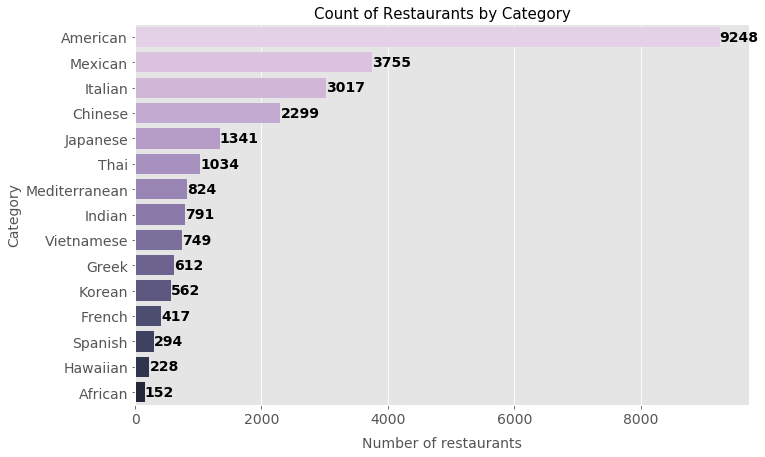

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))

grouped = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants, 
              order = grouped.index, palette= sns.color_palette("ch:s=-.25,rot=.25", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

 The top 5 type of restaurants are American, Mexican, Italian, Chinese and Japanese.


## 5.2. Top 10 cities with most restaurants


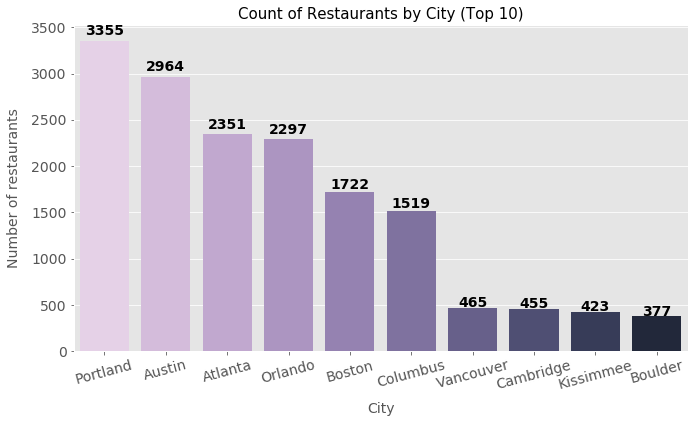

In [32]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("ch:s=-.25,rot=.25", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In this yelp database, most restaurants are located in the city of Portland, Austin, Atlanta, Orlando, and Bostan. 

## 5.3. Distribution of Restaurants in each State

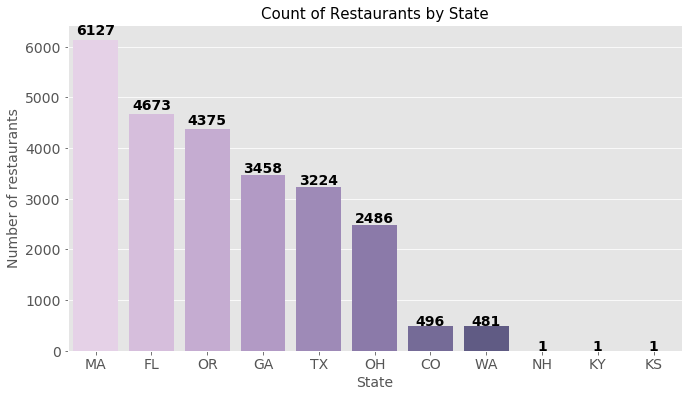

In [33]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.state.value_counts()
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("ch:s=-.25,rot=.25", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14);

In this yelp database, most restaurants are in Massachusetts and Florida.

## 5.4. Restaurant Reviews Distribution

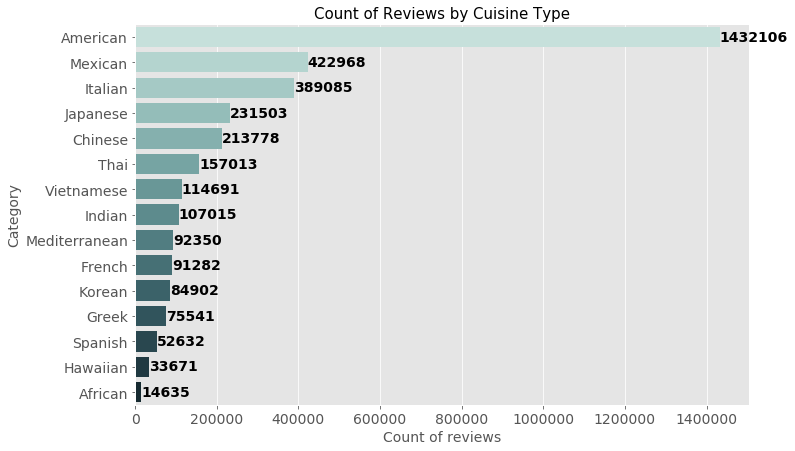

In [34]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("ch:start=-.38,rot=-.11", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

Previously, we find that the top 5 type of restaurants are American, Mexican, Italian, Chinese and Japanese.
In terms of reviews, American, Mexican, Italian, Japanese, Chinese restaurants also have the most number of reviews.

## 5.5. Top 10 cities' restaurants received the most reviews


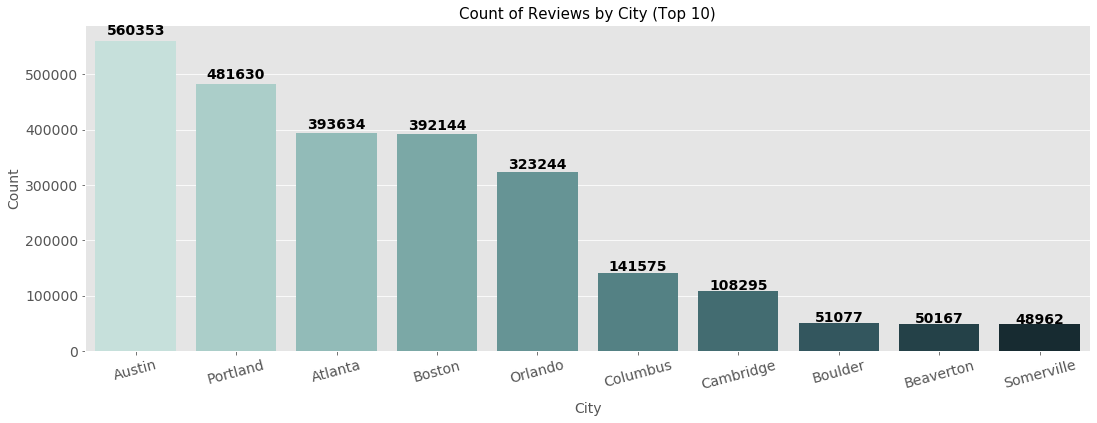

In [35]:
plt.figure(figsize=(18,6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("ch:start=-.38,rot=-.11", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14);

Interesting, those restaurants in Austin receieved the most number of reviews. 

## 5.6. Top 10 restaurants received most reviews

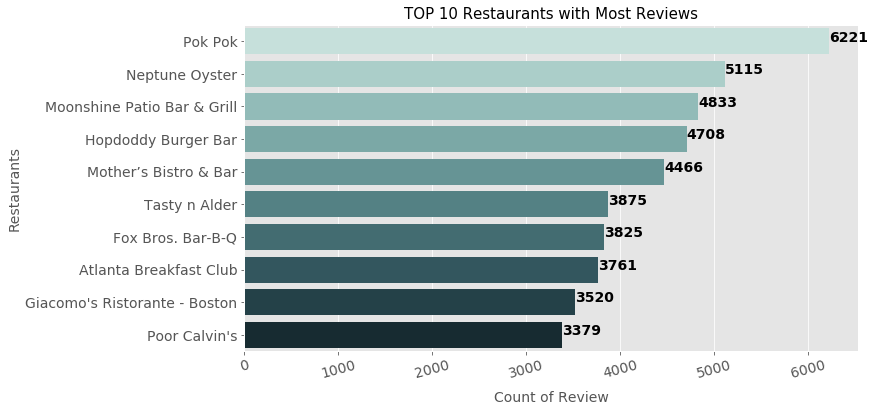

In [36]:
plt.figure(figsize=(11,6))
grouped = us_restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("ch:start=-.38,rot=-.11", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

I want to know which specific restaurants received the most number of reviews. We can see that "Pok Pok" is ranked No.1.
And then it is "Neptune Oyster". 

"Pok Pok" is a very famous Thai restaurant chain in the US. I ike Thai food, but in Canada, we only have Thai Express, which may be very similar to "Pok Pok" in the States.

## 5.7. Distribution of positive and negative reviews in each restaurant category


In [37]:
# create a pivot table
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table

review_id                
labels         negative positive    All
category                               
African              69      206    275
American           5153    16104  21257
Chinese            1060     2570   3630
French              181      938   1119
Greek               272     1200   1472
Hawaiian             51      290    341
Indian              384     1045   1429
Italian            1442     4398   5840
Japanese            570     2161   2731
Korean              174      651    825
Mediterranean       211      951   1162
Mexican            1422     4575   5997
Spanish             143      935   1078
Thai                424     1531   1955
Vietnamese          254     1221   1475
All               11810    38776  50586

In [38]:
# divide by the last column
table.div(table.iloc[:,-1], axis=0)

review_id               
labels         negative  positive  All
category                              
African        0.250909  0.749091  1.0
American       0.242414  0.757586  1.0
Chinese        0.292011  0.707989  1.0
French         0.161752  0.838248  1.0
Greek          0.184783  0.815217  1.0
Hawaiian       0.149560  0.850440  1.0
Indian         0.268719  0.731281  1.0
Italian        0.246918  0.753082  1.0
Japanese       0.208715  0.791285  1.0
Korean         0.210909  0.789091  1.0
Mediterranean  0.181583  0.818417  1.0
Mexican        0.237119  0.762881  1.0
Spanish        0.132653  0.867347  1.0
Thai           0.216880  0.783120  1.0
Vietnamese     0.172203  0.827797  1.0
All            0.233464  0.766536  1.0

In [39]:
# calculate the percentage of positive reviews
#.iloc[:-1,-2], exclude last row and only remain positive column
table_percentage = table.div(table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
table_percentage

category
Spanish          0.867347
Hawaiian         0.850440
French           0.838248
Vietnamese       0.827797
Mediterranean    0.818417
Greek            0.815217
Japanese         0.791285
Korean           0.789091
Thai             0.783120
Mexican          0.762881
American         0.757586
Italian          0.753082
African          0.749091
Indian           0.731281
Chinese          0.707989
Name: (review_id, positive), dtype: float64

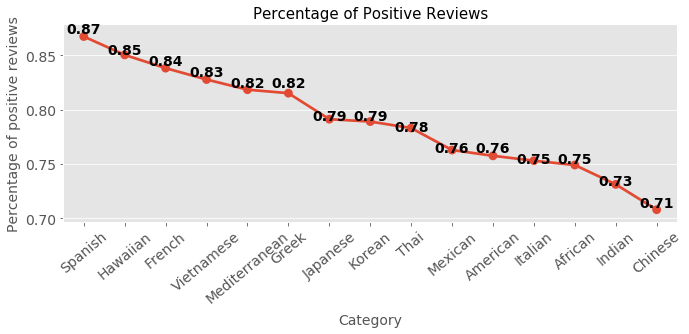

In [40]:
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

Spanish cuisine has the most percentage of positive reviews. 

## 5.8. Avergae Rating of Each Type of Restaruant 

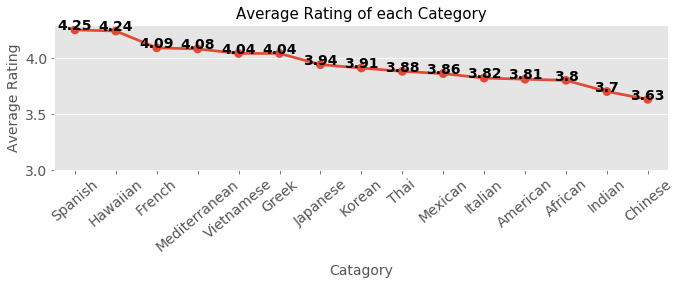

In [41]:
plt.figure(figsize=(11,8))
plt.subplot(212)
grouped = restaurants_reviews.groupby('category')['review_star'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1);

Spanish restaruants have the highest average rating, and this result is aligned with Spanish restaurants have the highest
percentage of positive reviews. 


# 5.9. Average Length of Reviews by Positive and Negative Reviews


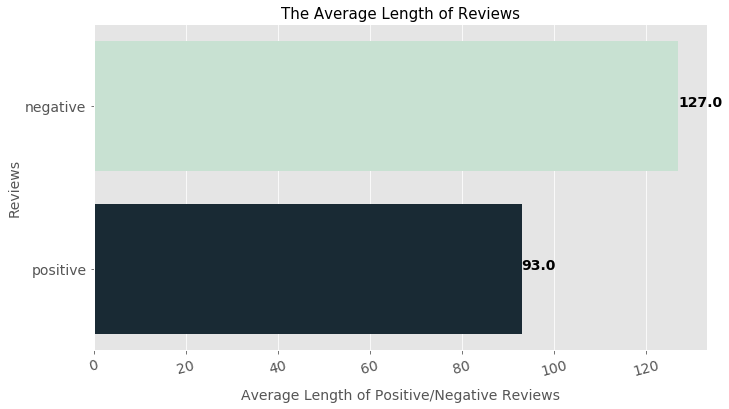

In [42]:
plt.figure(figsize=(11,6))
new=restaurants_reviews[['labels','num_words_review']].groupby(['labels']).mean().round(0)
sns.barplot(x=new.num_words_review, y = new.index, palette=sns.color_palette("ch:start=-.25,rot=-.25", len(new)), ci=None)
plt.xlabel('Average Length of Positive/Negative Reviews', labelpad=10, fontsize=14)
plt.ylabel('Reviews', fontsize=14)
plt.title('The Average Length of Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(new.num_words_review):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)


We can find that negative reviews have longer length. This might be because customers tend to type more when they think the restaurants have
some aspects which need to be improved.

## 5.10. Average Review Length by Restaurantes Types

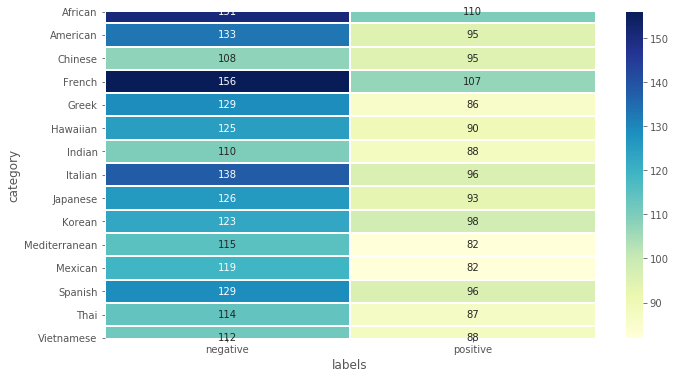

In [43]:
plt.figure(figsize=(11,6))
table = restaurants_reviews.groupby(['category','labels'])['num_words_review'].mean().round().unstack()
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=10)

It is very interesting to see that negative reviews are generally longer than positive reviews.

## 5.11. Ratings Distribution

In [44]:
# Distribution of ratings in the restaurants 

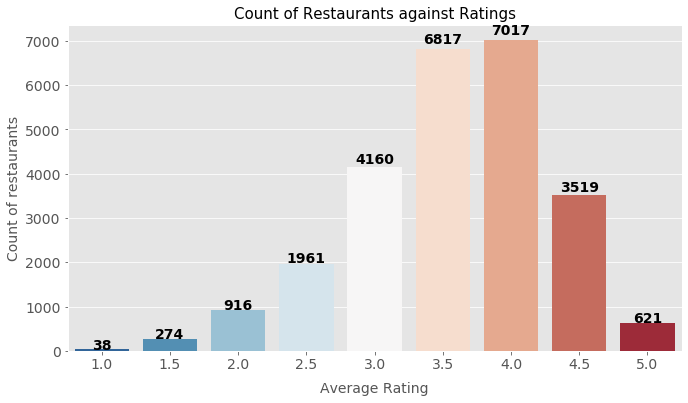

In [45]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# 6. Cleaning and Processing Text Data

In [46]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
## convert text to lower case

restaurants_reviews.text=restaurants_reviews['text'].str.lower()

In [48]:
## remove unnecessary punctuation
restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')

In [49]:
# positive words
#file_positive = open('positive.txt')
#reader =csv.reader(file_positive)
# positive_words = [word[0] for word in reader]

In [50]:
## import negative file which contains common meaningless negative words such as bad
#file_negative = open('negative.txt',encoding = "ISO-8859-1")
#reader =csv.reader(file_negative)
#negative_words = [word[0] for word in reader]

In [51]:
## get dataset by category
# For example, we may want to focus on Spanish restaurants, and then we want to filter a new database 
def get_dataset(category):
    df = restaurants_reviews[['removed_punct_text','labels']][restaurants_reviews.category==category]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return df

In [52]:
## only keep positive and negative words
#def filter_words(review):
    
    #words = [word for word in review.split() if word in positive_words + negative_words]
    #words = ' '.join(words)
    #return words

## 6.1. Use Spanish and Chinese Restaurants as examples 

In [53]:
Spanish_reviews = get_dataset('Spanish')
Spanish_reviews

,text,labels
0,this place was great it is exactly what we wan...,positive
1,awesome steaks and the brie appetizer is so am...,positive
2,manfriend and i were absolutely giddy on our w...,negative
3,good creative food in a fun atmosphereservice ...,positive
4,i can't say enough good things about blue ox t...,positive
...,...,...
1073,the food was great we got the skirt steak cala...,positive
1074,i've been to taco cowboy twice now and will de...,positive
1075,stopped in just by chance and we were complete...,positive
1076,in town visiting and came here on friday nigh...,positive


In [54]:
from nltk.tokenize import word_tokenize 
from nltk import FreqDist, bigrams
def plot_frequency_of_word(restaurant):
    review=get_dataset(restaurant).text.astype(str).str.cat()
    review=word_tokenize(review)
    stop = stopwords.words("english")
    stop.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',',',', ','.',
                '1','2','3','4','5','6','7','8','9','10',"n't",'s',"'s","'ve"])
    updated_text=[token for token in review if token not in stop]
    
    fd = FreqDist()
    
    for word in updated_text:
        fd[word]=fd[word]+ 1
        
    print(fd.most_common(10))
# Plotting the top 50 most frequent words
    plt.figure(figsize = (15, 8))
    fd.plot(50);
    

## 6.2 Top 10 Unigram

[('food', 3441), ('good', 2142), ('place', 2000), ('chinese', 1649), ('chicken', 1324), ('like', 1250), ('great', 1106), ('service', 1031), ('get', 1000), ('restaurant', 996)]


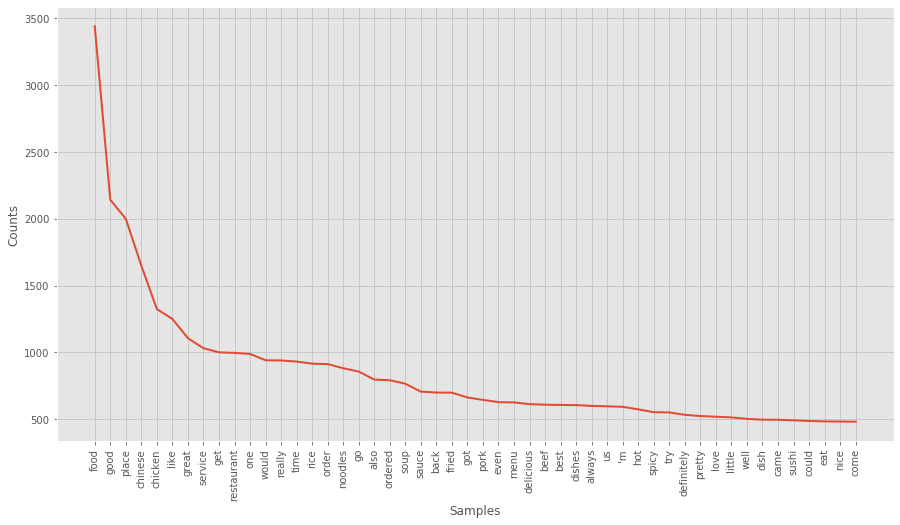

In [55]:
plot_frequency_of_word('Chinese')

[('food', 872), ('great', 647), ('good', 606), ('place', 562), ('service', 450), ('like', 340), ('restaurant', 340), ('us', 309), ('one', 308), ('would', 308)]


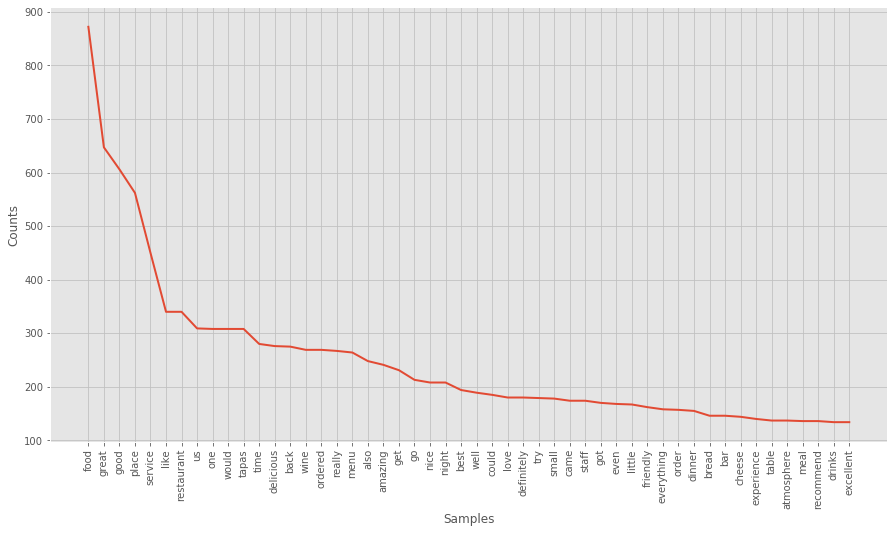

In [56]:
plot_frequency_of_word('Spanish')

We can find that "food" "great" "good""place" all frequently appear in Spanish and Chinese restaurants'reviews. In Chinese restaurants' reviews, customers also often mention "chinese" and "chicken". Spanish restaurants' reviews mentioned "service.

## 6.3. Top 10 Bi-grams

In [57]:
def plot_frequency_bigrams(restaurant):
    from nltk import bigrams
    review=get_dataset(restaurant).text.astype(str).str.cat()
    review=word_tokenize(review)
    stop = stopwords.words("english")
    stop.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',',',', ','.',
                '1','2','3','4','5','6','7','8','9','10',"n't",'s',"'s","'ve"])
    updated_text=[token for token in review if token not in stop]
    bigrams = bigrams(updated_text)

    fd = FreqDist()
    
    for word in bigrams:
        fd[word]=fd[word]+ 1
        
    print(fd.most_common(20))
# Plotting the top 50 most frequent words
    plt.figure(figsize = (15, 8))
    fd.plot(20);
    

[(('food', 'great'), 54), (('small', 'plates'), 48), (('happy', 'hour'), 44), (('food', 'good'), 44), (('great', 'service'), 42), (('wine', 'list'), 42), (('highly', 'recommend'), 41), (('patatas', 'bravas'), 39), (('great', 'food'), 38), (('mexican', 'food'), 37), (('go', 'back'), 36), (('first', 'time'), 36), (('food', 'service'), 34), (('service', 'great'), 34), (('really', 'good'), 34), (('come', 'back'), 34), (('good', 'food'), 31), (('great', 'place'), 30), (('blue', 'ox'), 29), (('next', 'time'), 29)]


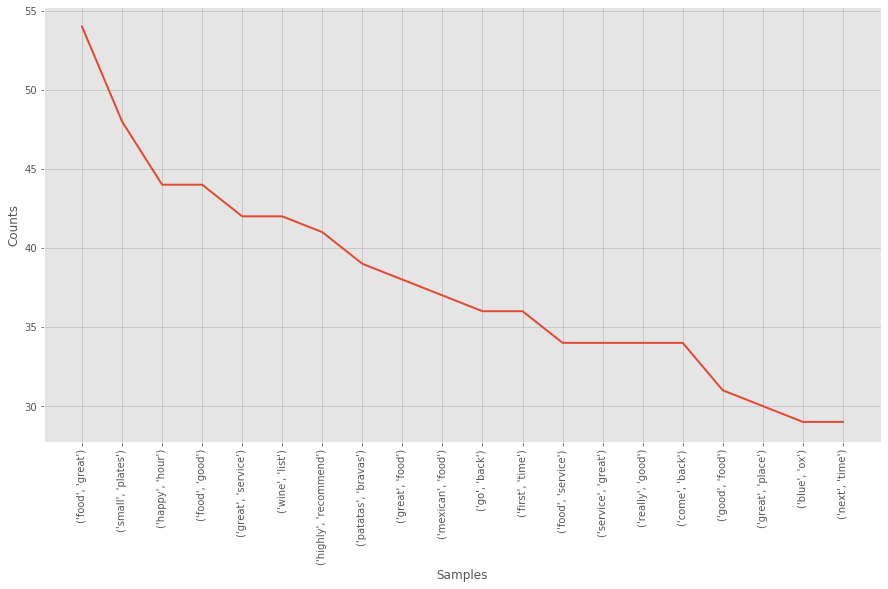

In [58]:
plot_frequency_bigrams('Spanish')

We can find that it is very interesting many customers mentioned "small plates", "happy hour", "great service" "highly recommended" in the reviews. 

[(('chinese', 'food'), 553), (('fried', 'rice'), 325), (('dim', 'sum'), 287), (('really', 'good'), 159), (('chinese', 'restaurant'), 148), (('pretty', 'good'), 136), (('hot', 'pot'), 135), (('food', 'good'), 132), (('hot', 'sour'), 125), (('noodle', 'soup'), 124), (('first', 'time'), 119), (('lo', 'mein'), 112), (('general', 'tso'), 110), (('come', 'back'), 106), (('sweet', 'sour'), 105), (('food', 'great'), 104), (('best', 'chinese'), 104), (('sour', 'soup'), 104), (('good', 'food'), 104), (('go', 'back'), 102)]


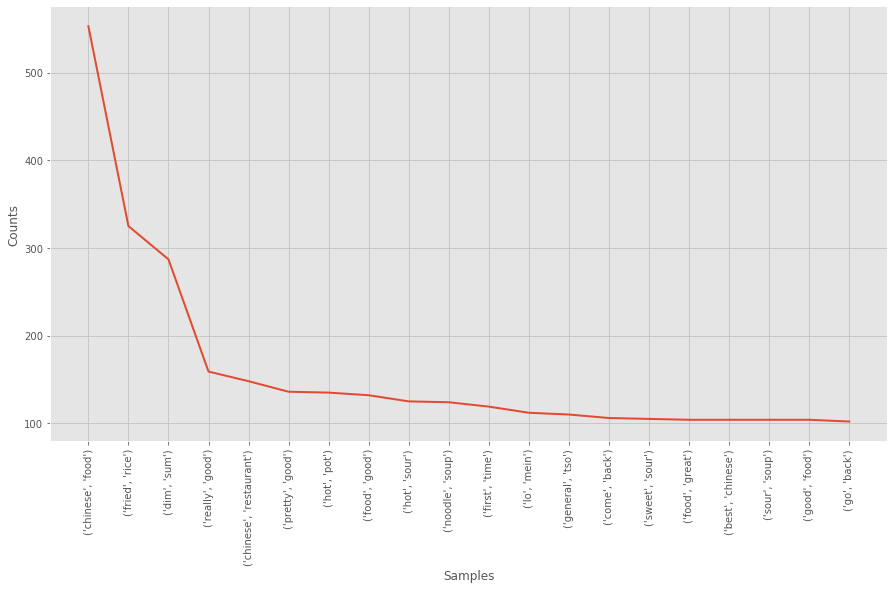

In [59]:
plot_frequency_bigrams('Chinese')

Customers mentioned a lot of food for example "fried rice", "dim sum", "hot pot"."noodle" "soup" in the reviews. These food may be liked and highly recommended by customers. 

# 7. Naive Bayesian Model

Naive Bayes are mostly used in natural language processing (NLP) problems.
Naive Bayesian classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but rather a family of algorithms where all of them make the following naive assumptions:

All features are independent from each other.
Every feature contributes equally to the output.
In our case, these two assumptions can be interpreted as:

Each word is independent from the other words, no relation between any two words of a given sentence.
Each word contributes equally, throughout all sentences, to the decision of our model, regardless of its relative position in the sentence.

In [60]:
data=restaurants_reviews[['removed_punct_text','labels']]
data=data.rename(columns={"removed_punct_text": "text"})

In [61]:
data

,text,labels
0,stopped in on a busy friday night despite the ...,positive
1,went there about 1 pm on a monday it wasn't p...,negative
2,this was the place the be on friday night if y...,positive
3,went to this place with my family over the wee...,positive
4,stopped on a midweek afternoon and so glad tha...,positive
...,...,...
50581,the portion size at the lake buena vista locat...,negative
50582,i went here for the 7 express lunch because my...,positive
50583,i had one of the worst dining experiences ever...,negative
50584,wow file this under that was fast i received ...,positive


In [62]:
import numpy as np
data['labels'] = np.where(data['labels'] == "positive",1, 0)
data

,text,labels
0,stopped in on a busy friday night despite the ...,1
1,went there about 1 pm on a monday it wasn't p...,0
2,this was the place the be on friday night if y...,1
3,went to this place with my family over the wee...,1
4,stopped on a midweek afternoon and so glad tha...,1
...,...,...
50581,the portion size at the lake buena vista locat...,0
50582,i went here for the 7 express lunch because my...,1
50583,i had one of the worst dining experiences ever...,0
50584,wow file this under that was fast i received ...,1


## 7.1. Deal with Imbalanced Dataset

Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
There are many methods to adjust imbalanced data.
In this case, I choose to use random undersampling, which randomly deletes examples in the majority class.

In [63]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='majority')
new_x, new_y = undersample.fit_resample(data['text'].values.reshape(-1,1),data['labels'])

In [64]:
data['labels'].value_counts()

1    38776
0    11810
Name: labels, dtype: int64

In [65]:
new_y.value_counts()

1    11810
0    11810
Name: labels, dtype: int64

In [66]:
positive=pd.DataFrame(new_x[new_y==1])
negative=pd.DataFrame(new_x[new_y==0])

In [67]:
pos_list=positive[0].tolist()
neg_list=negative[0].tolist()

In [68]:
def word_feats(words):
    return dict([(word, True) for word in words.split()])

nltk's NaiveBayesClassifier has required format for the fitting text.

In [69]:
pos_feats = [(word_feats(f), 'positive') for f in pos_list ]
neg_feats = [(word_feats(f), 'negative') for f in neg_list ]

In [70]:
import random
final_data=pos_feats+neg_feats
random.Random(140).shuffle(final_data)
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]


In [71]:
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]


## 7.2. Train the Model

In [72]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

In [73]:
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

Accuracy on train data: 0.7729325430426193
Accuracy on test data: 0.709991532599492


The accuracy rate is 0.71. This Naive Bayes model performs very good. 

In [74]:
print(classifier.show_most_informative_features(20))

Most Informative Features
                inedible = True           negati : positi =     91.2 : 1.0
               poisoning = True           negati : positi =     57.8 : 1.0
                     ugh = True           negati : positi =     42.4 : 1.0
                  refund = True           negati : positi =     41.9 : 1.0
                   acted = True           negati : positi =     41.8 : 1.0
                   worst = True           negati : positi =     37.2 : 1.0
                  rudely = True           negati : positi =     35.8 : 1.0
              microwaved = True           negati : positi =     34.4 : 1.0
                downhill = True           negati : positi =     32.5 : 1.0
              flavorless = True           negati : positi =     32.4 : 1.0
                 yelling = True           negati : positi =     29.7 : 1.0
               tasteless = True           negati : positi =     29.5 : 1.0
                       0 = True           negati : positi =     29.1 : 1.0

Accuracy is defined as the percentage of tweets in the testing dataset for which the model was correctly able to predict the sentiment. A 71.8% accuracy makes me think there is still some space to improve. 

In the table that shows the most informative features, every row in the output shows the ratio of occurrence of a token in positive and negative tagged tweets in the training dataset. The first row in the data signifies that in all tweets containing the token "refund", the ratio of negative to positives tweets was 69.9 to 1. Further, words such as "poisoning", "lukewarm","worst","tasteless","inedible" " waste" also lead to negative sentiments.

## 7.3. Test the Model

In [75]:
from nltk.tag import pos_tag
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [76]:
custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

negative


In [77]:
custom_tweet = "Good food, nice service, quiet environment"
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

positive


# 8. Logistic Regression with Text Classification

## 8.1. Data Cleaning & Make sure data format can be put into CountVectorizer and TFIDF

In [78]:
# remove stop words
stop = stopwords.words("english")
stop.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',',',', ','.',
                '1','2','3','4','5','6','7','8','9','10',"n't",'s',"'s","'ve"])
data['text']= data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [79]:
sentences=data['text'].values
sentences

array(["stopped busy friday night despite crowd service expedient warm beers speak sampled taproom offerings galaxy smash clean tropical sessionablethis said real star place pizza hand tossed style crust that's perfect mix crispy doughy ordered special pizza luau bacon pineapple fresh jalapeño perfect mix fat sweetness heat looking comfortable spot grab beer share food friends pearl place",
       'went pm monday particularly busy seated quickly drink order taken promptly one coke one beer see server minutes believe bartender finally brought beer get coke brought second drink minutes later see server taking order another table minutes later brought people drinks see another minutes finally came back take order point 20 minutes place decided worth waiting put bucks got left poor service idea food since even get order second place walk due extremely poor service',
       'place friday night looking best french onion soup boulder paired best craft beer selection pearl street go go',
     

In [80]:
y=data['labels'].values

## 8.2 Training the Model
## CountVectorizer

Count Vectorizer is a way to convert a given set of strings into a frequency representation.


We need to convert text into numbers, and in doing so, we can put them into our models. We will try both Count Vectorize and TF-IDF Methods, and by comparing the accuracy rate of logstic models, we will chooe which method to use. 

In [81]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='majority')
new_x, new_y = undersample.fit_resample(data['text'].values.reshape(-1,1),data['labels'])

In [82]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.25, random_state=1000)

In [83]:
Counter(y_train)

Counter({0: 8891, 1: 8824})

In [84]:
# reformat the column to make it fit into model 
x_train_df=pd.DataFrame(x_train)
x_train_df[0]

0        attitude first impressions everythingoh well t...
1        let's start saying food great sat bar husband ...
2        several times never disappointed tried several...
3        bison burger amazing pricey quality food total...
4        impressed i've many many times always want lov...
                               ...                        
17710    authentic sure usually get breakfast tacos bur...
17711    excited try place live close sadly dropped bal...
17712    first last visit first time boston left astros...
17713    fine need food service slowest i've ever exper...
17714    customer service review walked sat bar 328 pm ...
Name: 0, Length: 17715, dtype: object

In [85]:
x_test_df=pd.DataFrame(x_test)
x_test_df[0]

0       food extremely salty fried rice fried wet serv...
1       place might new favorite thai restaurant togo ...
2       amazingly good food service excellent outdoor ...
3       glad tried place went friday night busy interi...
4       salad wilted pita stale edges picked bad lettu...
                              ...                        
5900    fastfood style sushi hibachi spot consistently...
5901    ordered delivery first time middle day order s...
5902    one favorite places columbus fantastic food de...
5903    disappointing five stars friendly service rest...
5904    what's love i'm vegan problem whatsoever findi...
Name: 0, Length: 5905, dtype: object

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train_df[0])
X_train_cv = vectorizer.transform(x_train_df[0])
X_test_cv = vectorizer.transform(x_test_df[0])
X_test_cv

<5905x47451 sparse matrix of type '<class 'numpy.int64'>'
	with 270938 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_cv, y_train)
score = classifier.score(X_test_cv, y_test)
score

0.9344623200677392

In [88]:
from sklearn.metrics import classification_report,confusion_matrix


In [89]:
predictions = classifier.predict(X_test_cv)


In [90]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2724  195]
 [ 192 2794]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2919
           1       0.93      0.94      0.94      2986

    accuracy                           0.93      5905
   macro avg       0.93      0.93      0.93      5905
weighted avg       0.93      0.93      0.93      5905



## TF-IDF

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_transformer = TfidfVectorizer()
X_train_tfidf = text_transformer.fit_transform(x_train_df[0])
X_test_tfidf = text_transformer.transform(x_test_df[0])

In [92]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)
predictions = classifier.predict(X_test_tfidf)

score = classifier.score(X_test_tfidf, y_test)
score

0.9395427603725657

In [93]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2758  161]
 [ 196 2790]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2919
           1       0.95      0.93      0.94      2986

    accuracy                           0.94      5905
   macro avg       0.94      0.94      0.94      5905
weighted avg       0.94      0.94      0.94      5905



No matter use Count Vectorizer or TF-IDF, the accuracy rate and F1 scores are very similar. 

## 8.3. Visualize the Embeddings 

Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

In [94]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ["orange", "blue", "blue"]
    if plot:
        plt.scatter(
            lsa_scores[:, 0],
            lsa_scores[:, 1],
            s=8,
            alpha=0.8,
            c=test_labels,
            cmap=matplotlib.colors.ListedColormap(colors),
        )
        red_patch = mpatches.Patch(color="orange", label="Positive")
        green_patch = mpatches.Patch(color="blue", label="Negative")
        plt.legend(handles=[red_patch, green_patch], prop={"size": 16})


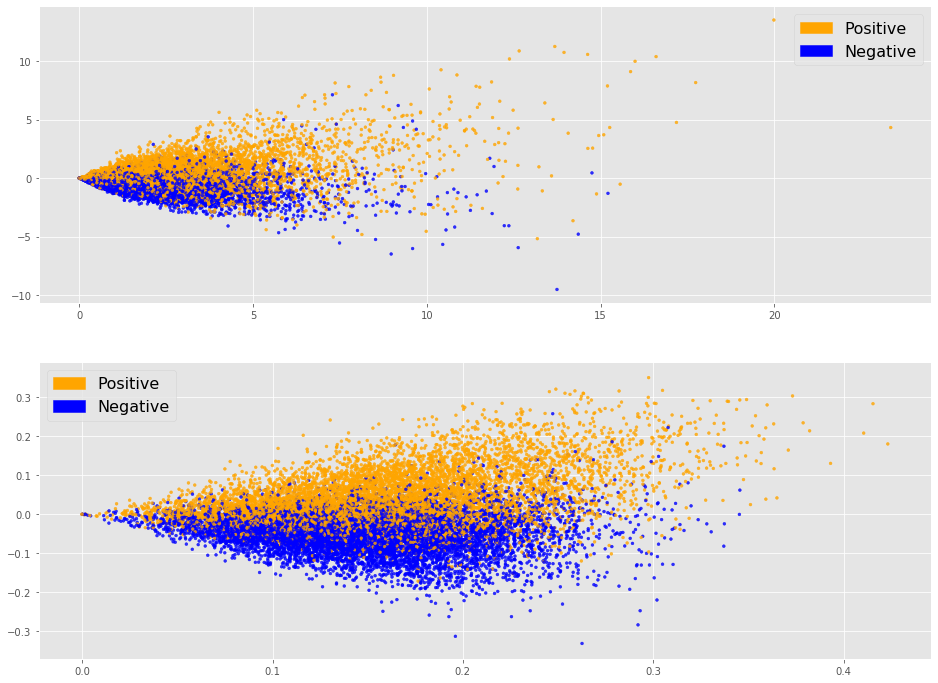

In [95]:
plt.figure(1, figsize=(16, 12))
plt.subplot(2, 1, 1)
plot_LSA(X_train_cv, y_train)
plt.subplot(2, 1, 2)
plot_LSA(X_train_tfidf, y_train)

## 8.4 Grid Search to test best hyperparameters 

In [96]:
#custom_tweet = "I hate this restaurant's food because it is very spicy and sour."
#.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#custom_tokens = remove_noise(word_tokenize(custom_tweet))
#custom_tokens

In [97]:
#text_transformer.fit_transform(custom_tokens)

In [98]:
# classifier.predict(text_transformer.fit_transform(custom_tokens))

In [99]:
#x_train_df=pd.DataFrame(x_train)
# x_train_df[0]

In [100]:
#Counter(y_train)

In [101]:
def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [102]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [104]:
gs_lr_tfidf.fit(x_train_df[0], y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__preprocessor': [None,
                                                 <function preprocessor at 0x7fd65021b0d0>],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we'...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
             

In [105]:
clf = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % clf.score(pd.DataFrame(x_test)[0], y_test))

Accuracy in test: 0.940


In [106]:
twits = [
    "Tastes great! Eating something delicious right now?",
    "I think the food is too salty, and the environment is extremly noisy",
    "I will choose this restaurant again",
    "service is bad"
]

preds = clf.predict(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> {preds[i]}')

Tastes great! Eating something delicious right now? --> 1
I think the food is too salty, and the environment is extremly noisy --> 0
I will choose this restaurant again --> 0
service is bad --> 0


# 9 Conclusion 

Yelp's website, Yelp.com, is a crowd-sourced local business review and social networking site. Yelp users submit their reviews of products or services, and by analysing business and review datasets. We have interesting findings as follows. 

1. We find that American, Mexican, Italian, Chinese and Japanese cuisine have the most number of restaurants in the U.S., or specially, in terms of the Yelp databases.

2. We can see which city and State these restaurants are mostly located in. Most of them are in the cities of Portland, Austin and Atlanta. Massachusetts and Florida are the States which have the most restaurants in this database.  

3. We can also know which restaurants are the most popular restaurants in the States because they may receive the most number of customers' reviews.

4. We also find some characteristics of negative and positive reviews. Positive reviews tend to be shorter than negative reviews. Spanish restaurants received the highest proportion of positive reviews (87%) , but only 71% of Chinese restaurants' reviews are positive. 

5. By conducting text processing, we are able to find which words have the highest frequency in customers' reviews. For example, "food" "great" "good""place" all frequently appear in Spanish and Chinese restaurant reviews. In Chinese restaurants' reviews, customers also often mention "chinese" and "chicken". Spanish restaurants' reviews mentioned "service" a lot.

6. We can also find the top 10 bigrams (a two-word sequence of words) in the dataset. "food great", "small plates", "happy hour", "great service" "highly recommended" in the Spanish restaurants' reviews. "Fried rice", "dim sum", "hot pot"."noodle" "soup" are often in the Chinese restaurants' reviews. These foods may be liked and highly recommended by customers.

7. In terms of modelling, we firstly tried Naive Bayesian modelling. The accuracy rate can arrive at approximately 71%, and the model's performance is actually quite good.

8. Then, we tried a logistic regression model since sentiment analysis has a binary dependent variable. Logistic regression performs very well in this case. Accuracy rate can be around 94%, and precision, recall and F1-score all be about 94%. 

9. In the future, we can use deep learning LSTM models to conduct sentiment analysis. Since logistic regression has already performed very well in this case and I also want to reduce the complexity of our model, I didn't try deep learning. 

Thanks for reading. Please feel free to provide suggestions for my project.  :)